In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly.graph_objects as go

In [2]:
with open('StreamingHistory0.json', encoding='utf8') as f:
    data = json.load(f)

print(data[:5])

[{'endTime': '2019-11-26 17:56', 'artistName': 'Jessie James Decker', 'trackName': 'Old Town Road (Jessie James Decker Version)', 'msPlayed': 152899}, {'endTime': '2019-11-28 09:53', 'artistName': 'Kina', 'trackName': 'Can We Kiss Forever?', 'msPlayed': 81521}, {'endTime': '2019-11-28 09:58', 'artistName': 'Leon James', 'trackName': 'Kanne Kanne - Madras Gig', 'msPlayed': 231004}, {'endTime': '2019-11-28 09:58', 'artistName': 'Oorka', 'trackName': 'Thedadhey - Madras Gig', 'msPlayed': 6431}, {'endTime': '2019-11-28 10:01', 'artistName': 'Jessie James Decker', 'trackName': 'Old Town Road (Jessie James Decker Version)', 'msPlayed': 152699}]


In [3]:
history_1 = pd.DataFrame()

def extract_json_value(column_name):
    
    return [i[column_name] for i in data]

history_1['artist_name'] = extract_json_value('artistName')
history_1['end_time'] = extract_json_value('endTime')
history_1['ms_played'] = extract_json_value('msPlayed')
history_1['track_name'] = extract_json_value('trackName')

In [4]:
history_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist_name  6214 non-null   object
 1   end_time     6214 non-null   object
 2   ms_played    6214 non-null   int64 
 3   track_name   6214 non-null   object
dtypes: int64(1), object(3)
memory usage: 194.3+ KB


In [5]:
history_2 = pd.DataFrame()

In [6]:
history= history_1.append(history_2)

In [7]:
history.head()

,artist_name,end_time,ms_played,track_name
0,Jessie James Decker,2019-11-26 17:56,152899,Old Town Road (Jessie James Decker Version)
1,Kina,2019-11-28 09:53,81521,Can We Kiss Forever?
2,Leon James,2019-11-28 09:58,231004,Kanne Kanne - Madras Gig
3,Oorka,2019-11-28 09:58,6431,Thedadhey - Madras Gig
4,Jessie James Decker,2019-11-28 10:01,152699,Old Town Road (Jessie James Decker Version)


In [8]:
history['end_time'] = pd.to_datetime(history['end_time'])
history.head()

,artist_name,end_time,ms_played,track_name
0,Jessie James Decker,2019-11-26 17:56:00,152899,Old Town Road (Jessie James Decker Version)
1,Kina,2019-11-28 09:53:00,81521,Can We Kiss Forever?
2,Leon James,2019-11-28 09:58:00,231004,Kanne Kanne - Madras Gig
3,Oorka,2019-11-28 09:58:00,6431,Thedadhey - Madras Gig
4,Jessie James Decker,2019-11-28 10:01:00,152699,Old Town Road (Jessie James Decker Version)


In [9]:
history['minutes_played'] = history.ms_played.divide(60000)
history.drop('ms_played', axis=1, inplace=True)
history.head()

,artist_name,end_time,track_name,minutes_played
0,Jessie James Decker,2019-11-26 17:56:00,Old Town Road (Jessie James Decker Version),2.548317
1,Kina,2019-11-28 09:53:00,Can We Kiss Forever?,1.358683
2,Leon James,2019-11-28 09:58:00,Kanne Kanne - Madras Gig,3.850067
3,Oorka,2019-11-28 09:58:00,Thedadhey - Madras Gig,0.107183
4,Jessie James Decker,2019-11-28 10:01:00,Old Town Road (Jessie James Decker Version),2.544983


In [10]:
most_played_artists_by_count = history.groupby(by='artist_name')['track_name'].count().sort_values(ascending=False)[:20]

print('The most popular artists by number of times their songs were played were: \n\n{}'.format(most_played_artists_by_count))

The most popular artists by number of times their songs were played were: 

artist_name
One Direction          352
A.R. Rahman            254
Imagine Dragons        215
Anirudh Ravichander    164
Alan Walker            149
G. V. Prakash          148
Sid Sriram             145
Maroon 5               143
Avicii                 135
Hiphop Tamizha         119
Brodha V               117
Arijit Singh           115
Jonas Brothers         107
Shawn Mendes            99
Leon James              77
Armaan Malik            76
Michael Jackson         70
Ed Sheeran              68
Mohit Chauhan           68
Coldplay                63
Name: track_name, dtype: int64


In [11]:
colors = ['RGB(103, 0, 31)','RGB(178, 24, 43)','RGB(214, 96, 77)','RGB(244, 165, 130)','RGB(253, 219, 199)',
          'RGB(247, 247, 247)','RGB(209, 229, 240)','RGB(146, 197, 222)','RGB(67, 147, 195)','RGB(33, 102, 172)',
          'RGB(5, 48, 97)']


layout = go.Layout(
    title='Popularity Of Artists By Number Of Times Their Song Was Played',
    yaxis= dict(
        title="Number of Times Played",
        gridcolor='rgb(255, 255, 255)',
        zerolinewidth=1,
        ticklen=5,
        gridwidth=2,
        titlefont=dict(size=15)),
    xaxis=dict(title="Artist Name"))


fig = go.Figure(data=[go.Bar(x=most_played_artists_by_count.index,
                             y=most_played_artists_by_count,
                             textposition='auto',
                             opacity=1,
                             marker_color=colors)],layout = layout)

fig.show()


In [12]:
history['day'] = [d.date() for d in history['end_time']]
history['time'] = [d.time() for d in history['end_time']]
history.drop('end_time', axis=1, inplace=True)
history.head()

,artist_name,track_name,minutes_played,day,time
0,Jessie James Decker,Old Town Road (Jessie James Decker Version),2.548317,2019-11-26,17:56:00
1,Kina,Can We Kiss Forever?,1.358683,2019-11-28,09:53:00
2,Leon James,Kanne Kanne - Madras Gig,3.850067,2019-11-28,09:58:00
3,Oorka,Thedadhey - Madras Gig,0.107183,2019-11-28,09:58:00
4,Jessie James Decker,Old Town Road (Jessie James Decker Version),2.544983,2019-11-28,10:01:00


In [13]:
day = history.groupby(by=['day'], as_index=False).sum()
day.head()

,day,minutes_played
0,2019-11-26,2.548317
1,2019-11-28,14.306183
2,2019-12-08,5.094917
3,2019-12-09,2.418067
4,2019-12-10,0.130250


In [14]:
data  = go.Scatter(
                    x = day['day'],
                    y = day['minutes_played'],
                    mode = "lines+markers",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= day['day'])

layout = dict(title = 'Days vs Minutes played',
              xaxis= dict(title= 'Days',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Minutes Played',ticklen= 5,zeroline= False)
             )
fig = go.Figure(data=data,layout = layout)
fig.write_html('day.html')
fig.show()

In [15]:
date = history_1.append(history_2)
date['minutes_played'] = date.ms_played.divide(60000)
date.drop('ms_played', axis=1, inplace=True)

date['day'] = pd.DatetimeIndex(date['end_time']).day_name()

date.head()

,artist_name,end_time,track_name,minutes_played,day
0,Jessie James Decker,2019-11-26 17:56,Old Town Road (Jessie James Decker Version),2.548317,Tuesday
1,Kina,2019-11-28 09:53,Can We Kiss Forever?,1.358683,Thursday
2,Leon James,2019-11-28 09:58,Kanne Kanne - Madras Gig,3.850067,Thursday
3,Oorka,2019-11-28 09:58,Thedadhey - Madras Gig,0.107183,Thursday
4,Jessie James Decker,2019-11-28 10:01,Old Town Road (Jessie James Decker Version),2.544983,Thursday


In [16]:
date = date.groupby(by=['day'], as_index=False).sum()
date.head(6)

,day,minutes_played
0,Friday,2714.781517
1,Monday,2844.473917
2,Saturday,1123.353883
3,Sunday,904.207167
4,Thursday,2342.870067
5,Tuesday,2518.424383


In [17]:
fig = px.pie(date, names="day", values="minutes_played", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()

In [18]:
artist = history_1.append(history_2)
artist['minutes_played'] = artist.ms_played.divide(60000)
artist.drop('ms_played', axis=1, inplace=True)
artist.drop('end_time', axis=1, inplace=True)

artist.head()

,artist_name,track_name,minutes_played
0,Jessie James Decker,Old Town Road (Jessie James Decker Version),2.548317
1,Kina,Can We Kiss Forever?,1.358683
2,Leon James,Kanne Kanne - Madras Gig,3.850067
3,Oorka,Thedadhey - Madras Gig,0.107183
4,Jessie James Decker,Old Town Road (Jessie James Decker Version),2.544983


In [19]:
artist_1 = artist.drop_duplicates(subset = ["track_name"])
artist_1.drop('minutes_played', axis=1, inplace=True)
artist_1

/home/aravind/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,artist_name,track_name
0,Jessie James Decker,Old Town Road (Jessie James Decker Version)
1,Kina,Can We Kiss Forever?
2,Leon James,Kanne Kanne - Madras Gig
3,Oorka,Thedadhey - Madras Gig
5,Matt Simons,Catch & Release - Deepend Remix
...,...,...
6199,Chdry Saqib,Tareefan - Original
6200,Amaal Mallik,Buddhu Sa Mann
6201,Yash Narvekar,"Muqabla (From ""Street Dancer 3D"")"
6202,Arko,Nazm Nazm


In [20]:
artist_1 = artist_1.groupby(['artist_name'], as_index = False).count()

artist_1

,artist_name,track_name
0,Stand Up Comedy,2
1,2CELLOS,10
2,5 Seconds of Summer,2
3,8D Tunes,1
4,A Great Big World,1
...,...,...
630,blink-182,2
631,eudialyte,2
632,jxdn,1
633,oddschecker Betting Podcast,1


In [21]:
artist_1 = artist_1.rename(columns={"track_name": "unique_songs"})
artist_1.head()

,artist_name,unique_songs
0,Stand Up Comedy,2
1,2CELLOS,10
2,5 Seconds of Summer,2
3,8D Tunes,1
4,A Great Big World,1


In [22]:
time = artist.groupby(['artist_name'], as_index=False).sum()

time.head()

,artist_name,minutes_played
0,Stand Up Comedy,1.026433
1,2CELLOS,65.039233
2,5 Seconds of Summer,4.125367
3,8D Tunes,0.691733
4,A Great Big World,3.908200


In [23]:
top_artist = pd.merge(artist_1, time, on='artist_name')
top_artist = top_artist.sort_values(by='unique_songs', ascending=False).head(15)
top_artist

,artist_name,unique_songs,minutes_played
5,A.R. Rahman,61,745.567017
390,One Direction,42,909.143367
53,Arijit Singh,33,300.934233
43,Anirudh Ravichander,30,384.852083
497,Sid Sriram,24,355.003017
177,G. V. Prakash,23,383.115783
214,Hiphop Tamizha,21,294.655400
219,Imagine Dragons,19,562.207000
25,Alan Walker,16,349.312550
416,Pritam,15,90.496800


In [24]:
fig = px.scatter(top_artist, x="artist_name", y="minutes_played", title='Total amount of time spent listening to each artist', size="unique_songs", color_discrete_sequence=px.colors.sequential.RdBu)

fig.show()


In [25]:
song = history_1.append(history_2)
song['minutes_played'] = song.ms_played.divide(60000)
song.drop('ms_played', axis=1, inplace=True)
song

,artist_name,end_time,track_name,minutes_played
0,Jessie James Decker,2019-11-26 17:56,Old Town Road (Jessie James Decker Version),2.548317
1,Kina,2019-11-28 09:53,Can We Kiss Forever?,1.358683
2,Leon James,2019-11-28 09:58,Kanne Kanne - Madras Gig,3.850067
3,Oorka,2019-11-28 09:58,Thedadhey - Madras Gig,0.107183
4,Jessie James Decker,2019-11-28 10:01,Old Town Road (Jessie James Decker Version),2.544983
...,...,...,...,...
6209,Christina Perri,2020-11-26 11:49,A Thousand Years,3.721000
6210,Christina Perri,2020-11-26 12:04,A Thousand Years,1.032600
6211,Ed Sheeran,2020-11-26 12:08,Shape of You,3.895200
6212,The Chainsmokers,2020-11-26 12:23,Something Just Like This,3.115517


In [26]:
song = song.groupby(['track_name'], as_index=False).sum()
song = song.sort_values(by='minutes_played', ascending=False)
song

,track_name,minutes_played
1232,The Nights,212.765433
37,Aathma Raama,177.559483
13,A Thousand Years,151.045233
1348,"Verithanam (From ""Bigil"")",144.553417
52,Aigiri Nandini Eye for an Eye,143.111850
...,...,...
1097,Selfish,0.000000
499,I Want to Write You a Song,0.000000
709,Love Like This - Acoustic,0.000000
1149,Speechless (feat. Erika Sirola),0.000000


In [27]:

song_artist = history_1.append(history_2)
song_artist = song_artist.sort_values(by='track_name', ascending=False)
song_artist.drop('end_time', axis=1, inplace=True)
song_artist.drop('ms_played', axis=1, inplace=True)
song_artist.head(10)

,artist_name,track_name
6064,Jay Chou,告白氣球
4569,Christina Perri,tiny victories
5074,Christina Perri,the words
4480,Christina Perri,the words
2035,eudialyte,say no to this x the room where it happens
1958,eudialyte,say no to this x the room where it happens
5811,Billie Eilish,lovely (with Khalid)
1700,eudialyte,love story disco lines remix
2036,eudialyte,love story disco lines remix
1701,eudialyte,love story disco lines remix


In [28]:
song_artist = song_artist.drop_duplicates(subset = ["track_name"])
song_artist


,artist_name,track_name
6064,Jay Chou,告白氣球
4569,Christina Perri,tiny victories
5074,Christina Perri,the words
2035,eudialyte,say no to this x the room where it happens
5811,Billie Eilish,lovely (with Khalid)
...,...,...
399,One Direction,18
3961,Machine Learning Guide,001 Introduction
494,When Chai Met Toast,'Hop Stomp'
3865,Our Future,"#53 Paul Vogel, CFO of Spotify"


In [29]:

song = pd.merge(song_artist, song, on='track_name')
song = song.sort_values(by='minutes_played', ascending=False)
song

,artist_name,track_name,minutes_played
222,Avicii,The Nights,212.765433
1417,Brodha V,Aathma Raama,177.559483
1441,Christina Perri,A Thousand Years,151.045233
106,A.R. Rahman,"Verithanam (From ""Bigil"")",144.553417
1402,Govind,Aigiri Nandini Eye for an Eye,143.111850
...,...,...,...
155,SAPPHIRE,Unity (Acoustic),0.000000
1150,Sigrid,Don’t Feel Like Crying,0.000000
150,Alphons Joseph,Unnikrishnan,0.000000
145,Olly Murs,Up (feat. Demi Lovato),0.000000


In [30]:
song = song.sort_values(by='minutes_played', ascending=False)
song.reset_index(inplace = True, drop = True) 
songs = song.drop([1,3,4,5,7,8,10,28,40,49]).head(50)
songs

,artist_name,track_name,minutes_played
0,Avicii,The Nights,212.765433
2,Christina Perri,A Thousand Years,151.045233
6,Alan Walker,On My Way,139.802250
9,Imagine Dragons,Radioactive,136.903000
11,Mohit Chauhan,Phir Se Ud Chala,130.135967
12,Anirudh Ravichander,"Vaathi Coming (From ""Master"")",127.012600
13,One Direction,You & I,123.289183
14,Raftaar,Naachne Ka Shaunq,116.733533
15,One Direction,Diana,115.256567
16,OneRepublic,Counting Stars,115.164783


In [31]:
songs.reset_index(inplace = True, drop = True)
songs

,artist_name,track_name,minutes_played
0,Avicii,The Nights,212.765433
1,Christina Perri,A Thousand Years,151.045233
2,Alan Walker,On My Way,139.802250
3,Imagine Dragons,Radioactive,136.903000
4,Mohit Chauhan,Phir Se Ud Chala,130.135967
5,Anirudh Ravichander,"Vaathi Coming (From ""Master"")",127.012600
6,One Direction,You & I,123.289183
7,Raftaar,Naachne Ka Shaunq,116.733533
8,One Direction,Diana,115.256567
9,OneRepublic,Counting Stars,115.164783


In [32]:
fig = px.bar(songs, x="track_name", y="minutes_played", title = 'Most Listened To Songs', color = "artist_name", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [4]:
my_songs = pd.read_csv("appusongs.csv", encoding= 'unicode_escape')
my_songs.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Avicii,The Days / Nights,The Nights,0ct6r3EGTcMLPtrXHDvVjc,0.527,0.835,6,-5.298,1,0.0433,0.000000,0.249,0.654,125.983,176658,4
1,Christina Perri,A Thousand Years,A Thousand Years,6lanRgr6wXibZr8KgzXxBl,0.421,0.407,10,-7.445,1,0.0267,0.000961,0.110,0.161,139.028,285120,3
2,Alan Walker,On My Way,On My Way,4n7jnSxVLd8QioibtTDBDq,0.509,0.689,1,-4.929,0,0.1020,0.000000,0.301,0.297,170.087,193798,4
3,Imagine Dragons,Night Visions,Radioactive,62yJjFtgkhUrXktIoSjgP2,0.448,0.784,9,-3.686,1,0.0627,0.000108,0.668,0.236,136.245,186813,4
4,A.R. Rahman,Rockstar,Phir Se Ud Chala,1kcV2LJxt5v0s2cEGtEJ5i,0.647,0.656,11,-8.632,1,0.0354,0.000163,0.343,0.453,119.965,268833,4


In [5]:
top_5 = my_songs.head(6)
top_5.drop('key', axis=1, inplace=True)
top_5.drop('mode', axis=1, inplace=True)
top_5.drop('liveness', axis=1, inplace=True)
top_5.drop('valence', axis=1, inplace=True)
top_5.drop('tempo', axis=1, inplace=True)
top_5.drop('duration_ms', axis=1, inplace=True)
top_5.drop('time_signature', axis=1, inplace=True)
top_5.drop('track_id', axis=1, inplace=True)
top_5.drop('album', axis=1, inplace=True)
top_5.drop('artist', axis=1, inplace=True)
top_5

/home/aravind/.local/lib/python3.8/site-packages/pandas/core/frame.py:4162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,track_name,danceability,energy,loudness,speechiness,instrumentalness
0,The Nights,0.527,0.835,-5.298,0.0433,0.000000
1,A Thousand Years,0.421,0.407,-7.445,0.0267,0.000961
2,On My Way,0.509,0.689,-4.929,0.1020,0.000000
3,Radioactive,0.448,0.784,-3.686,0.0627,0.000108
4,Phir Se Ud Chala,0.647,0.656,-8.632,0.0354,0.000163
5,Vaathi Coming,0.643,0.952,-4.150,0.2460,0.490000


In [6]:
import plotly.graph_objects as go

categories = ['danceability','energy',
              'loudness', 'speechiness', 'instrumentalness']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[0.527,0.835,-5.298,0.0433,0.0000],
      theta=categories,
      fill='toself',
      name='The Nights'
))

fig.add_trace(go.Scatterpolar(
      r=[0.421,0.407,-7.445,0.0267,0.000961],
      theta=categories,
      fill='toself',
      name='A Thousand Years'
))


fig.add_trace(go.Scatterpolar(
      r=[0.509,0.689,-4.929,0.1020,0.00000],
      theta=categories,
      fill='toself',
      name='On my way'
))
fig.add_trace(go.Scatterpolar(
      r=[0.448,0.784,-3.686,0.0627,0.000108],
      theta=categories,
      fill='toself',
      name='Radioactive'
))
fig.add_trace(go.Scatterpolar(
      r=[0.647,0.656,-8.632,0.0354,0.000163],
      theta=categories,
      fill='toself',
      name='Phir se Ud Chala'
))

fig.update_layout(
    title = "Diversity in audio features of top 3 songs",
    polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-10, 1]
    )),
  showlegend=True)
fig.write_image('Songdiversity.jpeg')
fig.show()

In [7]:

my_songs.mean(axis=0)
avg_my_songs = pd.DataFrame({"danceability":[0.589500], 
                             "energy":[0.660060],
                             "key":[4.420000],
                             "loudness":[-6.293780],
                             "mode":[0.500000],
                             "speechiness":[0.080354],
                             "instrumentalness":[0.022151],
                             "liveness":[0.206788],
                             "valence":[0.453488],
                             "tempo":[127.639420],
                             "duration_ms":[235277.380000],
                             "time_signature":[3.940000]})
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.5895,0.66006,4.42,-6.29378,0.5,0.080354,0.022151,0.206788,0.453488,127.63942,235277.38,3.94


In [8]:
v  = my_songs['valence']

data = go.Histogram(
    x=v,
    opacity=0.75,
    name = "song",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
layout = go.Layout(barmode='overlay',
                   title='Song Mood',
                   xaxis=dict(title='Happiness-->'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
fig.show()

In [9]:
less_count, more_count, middle_count = 0, 0, 0
  
# iterating each number in list 
for num in v: 
      
    # checking condition 
    if num >= 0 and num <0.5: 
        less_count += 1
        
    elif num >=0.5 and num < 0.6:
        middle_count += 1
  
    else: 
        more_count += 1
          
print("Less than 0.5: ", less_count) 
print("More than 0.6: ", more_count)
print("Between 0.5 and 0.6: ", middle_count)

Less than 0.5:  28
More than 0.6:  15
Between 0.5 and 0.6:  7


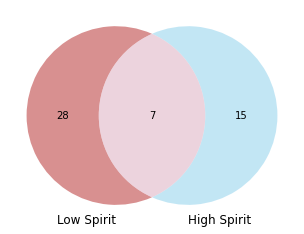

In [10]:

from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

venn2_unweighted(subsets = (28, 15, 7), set_labels = ('Low Spirit', 'High Spirit'), set_colors=('firebrick','skyblue'), alpha = 0.5);
plt.savefig('test.png')

In [40]:
fig = px.box(my_songs, y="tempo")
fig.show()
fig.write_html('tempo.html')

In [41]:
sr = pd.read_csv('sreelekshmi_songs.csv', encoding= 'unicode_escape')
sr.head()

,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Billy Joel,The Stranger (Legacy Edition),Vienna,4U45aEWtQhrm8A5mxPaFZ7,0.532,0.495,10,-6.662,1,0.0343,0.000000,0.0754,0.308,124.936,214240,4
1,Journey,The Essential Journey,Don't Stop Believin',77NNZQSqzLNqh2A9JhLRkg,0.491,0.802,4,-7.106,1,0.0392,0.000000,0.3870,0.472,119.250,248907,4
2,MEMBA,"For Aisha (Featured in ""The Sky Is Pink"")","For Aisha (Featured in ""The Sky Is Pink"")",6rfahvufEQDIVTHJIU2QQB,0.568,0.622,4,-6.548,1,0.1090,0.001800,0.5600,0.109,76.984,357931,4
3,Amit Trivedi,Kai Po Che (Original Motion Picture Soundtrack),Manja,6o1o5SVSqVPLKAnZxRQz4x,0.772,0.471,2,-7.611,1,0.0281,0.001820,0.1310,0.521,106.041,217027,3
4,Amit Trivedi,Aisha (Original Motion Picture Soundtrack),Sham,5Q58RkKyUafm15Syxg79DW,0.722,0.288,4,-10.767,1,0.0444,0.000011,0.1200,0.502,119.899,284627,4


In [42]:
sr.mean(axis=0)

danceability             0.567745
energy                   0.441273
key                      4.588235
loudness                -9.802235
mode                     0.901961
speechiness              0.040767
instrumentalness         0.006681
liveness                 0.174045
valence                  0.444618
tempo                  114.163647
duration_ms         263142.215686
time_signature           3.725490
dtype: float64

In [43]:
avg_sr = pd.DataFrame({"danceability":[56.77/100], 
                             "energy":[44.12/100],
                             "key":[4.588235],
                             "loudness":[-9.802235],
                             "mode":[0.901961],
                             "speechiness":[4.0767/100],
                             "instrumentalness":[0.006681],
                             "liveness":[17.4045/100],
                             "valence":[54.60/100],
                             "tempo":[114.163],
                             "duration_ms":[263142.215686],
                             "time_signature":[3.725]})

avg_sr['Who'] = 'Sreelekshmy'

avg_sr

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Who
0,0.5677,0.4412,4.588235,-9.802235,0.901961,0.040767,0.006681,0.174045,0.546,114.163,263142.215686,3.725,Sreelekshmy


In [44]:
avg_my_songs['Who'] = 'Appu'
avg_my_songs

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Who
0,0.5895,0.66006,4.42,-6.29378,0.5,0.080354,0.022151,0.206788,0.453488,127.63942,235277.38,3.94,Appu


In [45]:
average = avg_sr.append(avg_my_songs)
average

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Who
0,0.5677,0.44120,4.588235,-9.802235,0.901961,0.040767,0.006681,0.174045,0.546000,114.16300,263142.215686,3.725,Sreelekshmy
0,0.5895,0.66006,4.420000,-6.293780,0.500000,0.080354,0.022151,0.206788,0.453488,127.63942,235277.380000,3.940,Appu


In [51]:
average.to_csv('song12.csv', index=True)

In [54]:
average_comp = pd.read_csv('song12.csv', encoding= 'unicode_escape')
average_comp

,Feature,Appu,Sreelekshmy
0,danceability,0.589500,0.567700
1,energy,0.660060,0.441200
2,key,4.420000,4.588235
3,loudness,-6.293780,-9.802235
4,mode,0.500000,0.901961
5,speechiness,0.080354,0.040767
6,acousticness,0.022151,0.006681
7,liveness,0.206788,0.174045
8,valence,0.453488,0.546000
9,tempo,127.639420,114.163000


In [55]:

average_compare = average_comp.drop(average_comp.index[9])
average_compare = average_compare.drop(average_compare.index[2])
compare_features = average_compare.drop(average_compare.index[2])
compare_features

,Feature,Appu,Sreelekshmy
0,danceability,0.589500,0.567700
1,energy,0.660060,0.441200
4,mode,0.500000,0.901961
5,speechiness,0.080354,0.040767
6,acousticness,0.022151,0.006681
7,liveness,0.206788,0.174045
8,valence,0.453488,0.546000


In [ ]:
compare_features = compare_features.replace(['acousticness'])

In [57]:
trace1=go.Bar(x=compare_features['Feature'],y=compare_features['Sreelekshmy'],marker=dict(color='skyblue',opacity=1),name="Sreelekshmy")
trace2=go.Bar(x=compare_features['Feature'],y=compare_features['Appu'],marker=dict(color='darksalmon',opacity=1),name="Appu")

data=[trace1,trace2]

layout = go.Layout(title="My Music Preferences VS Sreelekshmy's",xaxis=dict(title="Features"),
                   barmode="group")

fig = go.Figure(data,layout)

fig.show()
fig.write_image('preference.jpeg')


In [ ]:
loudness = pd.DataFrame({"Who":['Appu', 'Sreelekshmy'],"Loudness":[-6.293780,-9.802235]})
loudness

In [ ]:
fig = px.bar(x=loudness['Who'], y=loudness['Loudness'],
              labels={"y": "Loudness Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Loudness Preference")

fig.show()
fig.write_image('loudness.jpeg')

In [ ]:

tempo = pd.DataFrame({"Who":['Appu', 'Sreelekshmy'],"Tempo":[127.639420,114.163000]})
tempo

In [ ]:
fig = px.bar(x=loudness['Who'], y=tempo['Tempo'],
              labels={"y": "Tempo Index",
                     "x": " "},
              color_discrete_sequence=px.colors.sequential.RdBu, title="Tempo Preference")

fig.show()

